# Introduction

Soit $f:[0,1]\longrightarrow \mathbb{R}$ définie pour tout $x\in[0,1]$ par $f(x) = \dfrac{1}{2}x(1-x)$.

On se propose d'étudier le comportement des suites récurrentes de relation de récurrence $u_{n+1}=f(u_n)$.

On étudiera d'abord la convergence de ces suites, en fonction de leur premier terme $u_0$, puis, en s'appuyant sur l'outil informatique, on regardera leur «comportement asymptotique», c'est-à-dire si elle s'approche d'une suite que l'on peut exprimer simplement.

# Étude générale

Soit $u_0\in[0,1]$, et $(u_n)$ la suite définie par $u_{n+1} = f(u_n)$ pour tout $n\in\mathbb{N}$.

- Établir le tableau de variation de la fonction $f$, en déduire que le segment $[0,1]$ est stable par $f$. En déduire que $(u_n)$ est bien définie, et bornée.
- En étudiant le signe de $g:x\longmapsto f(x)-x$, montrer que $(u_n)$ est monotone.
- Conclure que $(u_n)$

# Comportement asymptotique

On s'appuiera ici sur l'utilisation du langage informatique Python pour analyser le comportement de $u_n$ pour $n$ grand.

Tout d'abord, on importe dans l'instance Python démarrée les librairies de fonctions qui vont nous permettre, respectivement, de tracer des graphes (`matplotlib` et son module `matplotlib.pyplot`) et mener des calculs mathématiques (`numpy`):

In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact,widgets

*NB: La dernière ligne sert à présenter les figures tracées juste après les blocks de code sur cette page.*

On peut maintenant définir la fonction $f$ de la relation de récurrence:

In [2]:
def f(x):
    return 0.5*x*(1-x)

Et calculer quelques termes de la suite $(u_n)$ :

In [3]:
U = [0.5]
n = 30

for i in range(n):
    U.append(f(U[-1]))

Et enfin construire une figure `fig` constituée de deux graphes `ax0` et `ax1`, respectivement les termes de la suite $u_n$ et ceux de la suite $2^nu_n$:

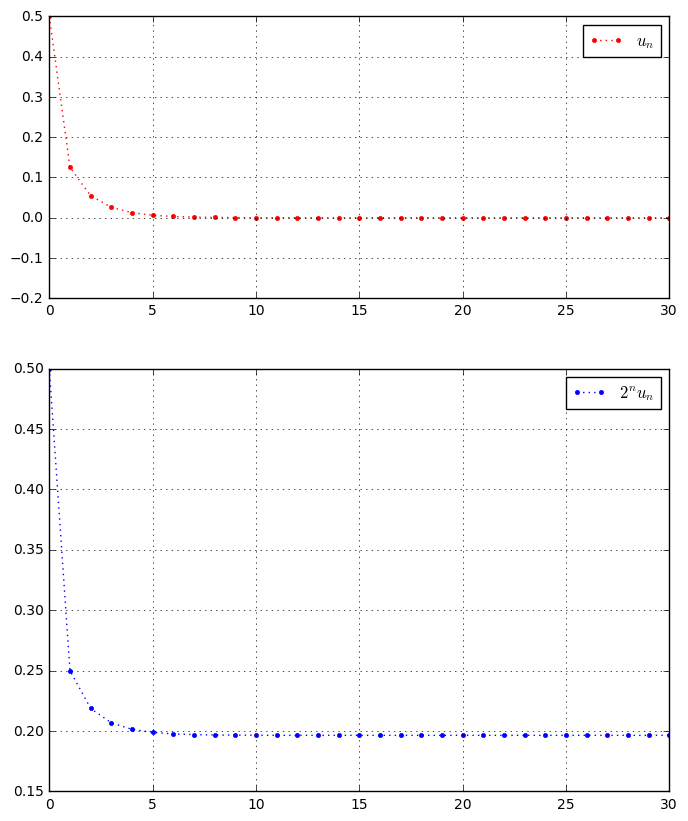

In [4]:
fig, (ax0,ax1) = plt.subplots(2,1, figsize=(8,10), dpi = 70, 
            gridspec_kw = {'height_ratios':[2, 3]})

ax0.grid()
ax0.plot(U, 'r.:', label = r'$u_n$')
ax0.legend()
ax0.set_ylim(bottom=-0.2)

ax1.grid()
def build_aux():
    su = [u*2**i for i,u in enumerate(U)]
    return su
s = build_aux()
ax1.plot(s, 'b.:', label= r'$2^nu_n$')
ax1.legend()

Pour avoir une idée de vers quoi tend $2^nu_n$, on peut prendre les derniers termes calculés:

In [5]:
s[-11:-1]

[0.19645349999004186,
 0.1964534631839566,
 0.19645344478092086,
 0.19645343557940473,
 0.1964534309786471,
 0.19645342867826837,
 0.19645342752807904,
 0.19645342695298437,
 0.19645342666543705,
 0.1964534265216634]

Ainsi, on a que $2^nu_n \longrightarrow C$, où $C \approx 0.196$ à $10^{-3}$ près, d'où
\begin{equation}
u_n \simeq \frac{0.196}{2^n}.
\end{equation}

# Une autre suite

On s'intéresse ici aux suites vérifiant une relation de récurrence de la forme

$$
u_{n+1} = a\sin(u_n)
$$

où $a\in\mathbb R$ est fixé.

On propose le programme suivant : les deux variables `a` et `u0` peuvent être ajustées pour étudier le comportement de la suite.

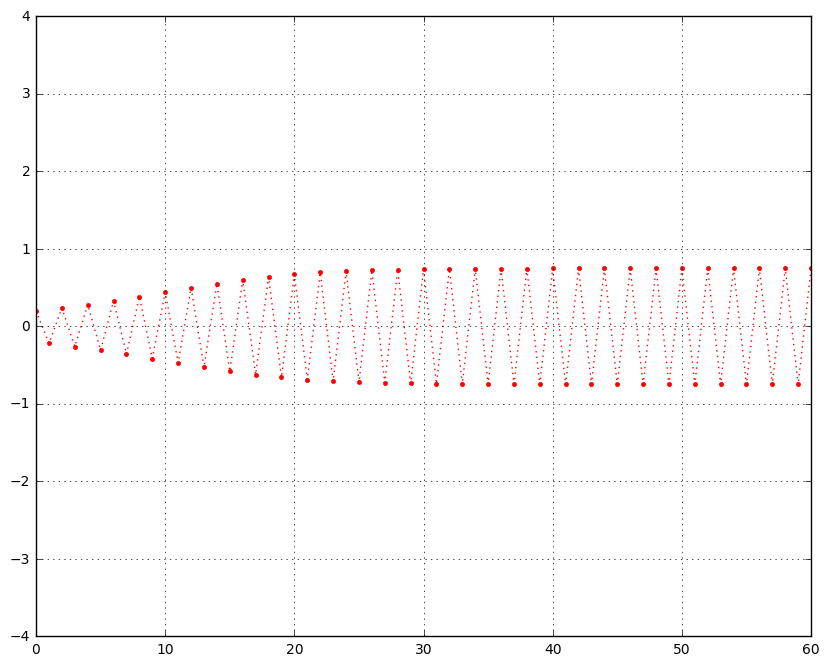

In [6]:
# Définition de f

def plot_u(a,u0):
    def F(x):
        return a*np.sin(x)

    U = [u0]
    n = 60

    for i in range(n):
        U.append(F(U[-1]))
    
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(1,1,1)
    ax.grid()
    ax.set_ylim(bottom=-4,top=4)
    ax.plot(U, 'r.:')
    ax.set_xlim()

# Éléments interactifs / sliders

interact(plot_u,
        a = widgets.FloatSlider(value=1,min=-4.,max=4.,step=0.05),
        u0 = widgets.FloatSlider(value=1,min=-1.,max=1.,step=0.05))